In [77]:
import importlib
import utils
import plot_utils
import pandas as pd
import matplotlib.pyplot as plt
import constants
import numpy as np

importlib.reload(utils)
importlib.reload(plot_utils)
importlib.reload(constants)


<module 'constants' from 'C:\\Users\\jaimo\\Documents\\GitHub\\visualizing-infrastructure-unfairness\\scripts\\constants.py'>

In [24]:
state_name = 'California'


C:\Users\jaimo\Documents\GitHub\visualizing-infrastructure-unfairness\scripts\utils.py:329: DtypeWarning: Columns (27,35) have mixed types. Specify dtype option on import or set low_memory=False.
  if county_name is not None:


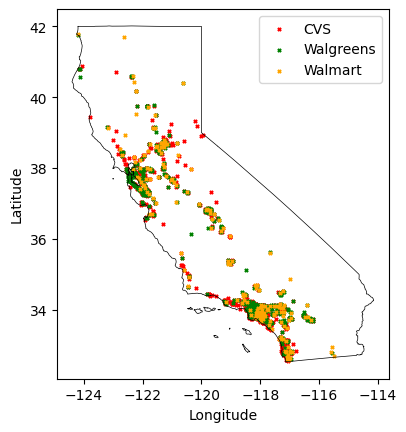

<Figure size 640x480 with 0 Axes>

In [25]:
plot_utils.plot_state_map(state_name)
plot_utils.plot_pharmacies(state_name, which='top3')
plt.show()
plt.clf()


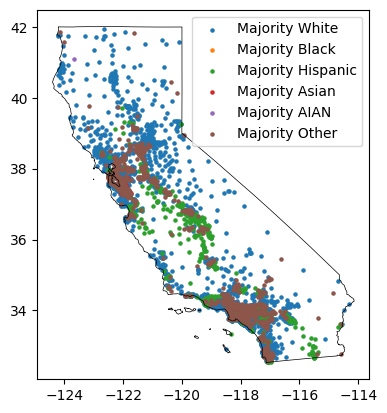

In [52]:
df = utils.get_dataframe(state_name)
races = ['White', 'Black', 'Hispanic', 'Asian', 'AIAN', 'NHPI', 'Other']
all_tracts = {race: [] for race in races}
n = len(df)
for j in range(n):
    if df.iloc[j].pct_NH_Blk_alone_ACS_10_14 >= 50:
        all_tracts['Black'].append(j)
    elif df.iloc[j].pct_NH_White_alone_ACS_10_14 >= 50:
        all_tracts['White'].append(j)
    elif df.iloc[j].pct_Hispanic_ACS_10_14 >= 50:
        all_tracts['Hispanic'].append(j)
    elif df.iloc[j].pct_NH_Asian_alone_ACS_10_14 >= 50:
        all_tracts['Asian'].append(j)
    elif df.iloc[j].pct_NH_AIAN_alone_ACS_10_14 >= 50:
        all_tracts['AIAN'].append(j)
    elif df.iloc[j].pct_NH_NHOPI_alone_ACS_10_14 >= 50:
        all_tracts['NHPI'].append(j)
    else:
        all_tracts['Other'].append(j)
        
plot_utils.plot_state_map(state_name)
        
for race in races:
    if len(all_tracts[race]) > 0:
        longitudes_group = [df.iloc[j].Longitude for j in all_tracts[race]]
        latitudes_group = [df.iloc[j].Latitude for j in all_tracts[race]]
        plt.scatter(longitudes_group, latitudes_group, marker='o', s=5, label='Majority ' + race)
    
plt.legend()


In [71]:
def get_medical_deserts(state_name, n_miles, poverty_threshold=30):
    dataframe = utils.get_dataframe(state_name)
    n = len(dataframe)
    print(n)
    
    latitudes = dataframe['Latitude'].values
    longitudes = dataframe['Longitude'].values
    
    medical_deserts = []
    medical_deserts_by_race = {race: [] for race in races}
    
    k, cvs_pharmacies, walgreens_pharmacies, walmart_pharmacies = utils.get_pharmacy_coordinates(state_name, which='top3')
    pharmacy_coordinates = cvs_pharmacies + walgreens_pharmacies + walmart_pharmacies
    
    for j in range(n):
        # print(j) if j % 10 == 0 else None
        minimum_distance = np.inf
        for i in range(k):
            pharmacy_latitude = pharmacy_coordinates[i][0]
            pharmacy_longitude = pharmacy_coordinates[i][1]
            distance = utils.distance_from_coordinates_2(latitudes[j], longitudes[j], pharmacy_latitude, pharmacy_longitude)
            if distance < minimum_distance:
                minimum_distance = utils.distance_from_coordinates(dataframe.iloc[j].Latitude, dataframe.iloc[j].Longitude, pharmacy_coordinates[i][0], pharmacy_coordinates[i][1])
           
        if minimum_distance > n_miles * constants.miles_to_km and dataframe.iloc[j].pct_Prs_Blw_Pov_Lev_ACS_10_14 >= poverty_threshold:
            medical_deserts.append([longitudes[j], latitudes[j]])
            if df.iloc[j].pct_NH_Blk_alone_ACS_10_14 >= 50:
                medical_deserts_by_race['Black'].append([longitudes[j], latitudes[j]])
            elif df.iloc[j].pct_NH_White_alone_ACS_10_14 >= 50:
                medical_deserts_by_race['White'].append([longitudes[j], latitudes[j]])
            elif df.iloc[j].pct_Hispanic_ACS_10_14 >= 50:
                medical_deserts_by_race['Hispanic'].append([longitudes[j], latitudes[j]])
            elif df.iloc[j].pct_NH_Asian_alone_ACS_10_14 >= 50:
                medical_deserts_by_race['Asian'].append([longitudes[j], latitudes[j]])
            elif df.iloc[j].pct_NH_AIAN_alone_ACS_10_14 >= 50:
                medical_deserts_by_race['AIAN'].append([longitudes[j], latitudes[j]])
            elif df.iloc[j].pct_NH_NHOPI_alone_ACS_10_14 >= 50:
                medical_deserts_by_race['NHPI'].append([longitudes[j], latitudes[j]])
            else:
                medical_deserts_by_race['Other'].append([longitudes[j], latitudes[j]])
                
    return medical_deserts, medical_deserts_by_race

In [72]:
medical_deserts, medical_deserts_by_race = get_medical_deserts(state_name, 5, 30)

7968


C:\Users\jaimo\Documents\GitHub\visualizing-infrastructure-unfairness\scripts\utils.py:348: DtypeWarning: Columns (27,35) have mixed types. Specify dtype option on import or set low_memory=False.
  walgreens_pharmacies = pharmacies_data[pharmacies_data['Pharmacy_Name'].str.contains('WALGREENS')]


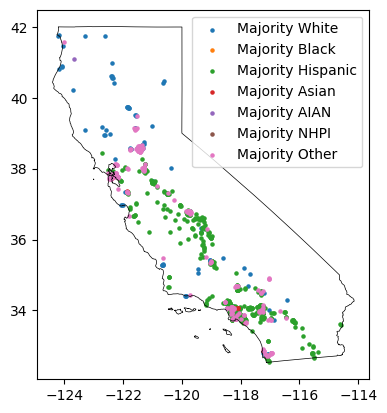

In [78]:
for race in races:
    plt.scatter([x[0] for x in medical_deserts_by_race[race]], [x[1] for x in medical_deserts_by_race[race]], marker='o', s=5, label='Majority ' + race)

plt.legend()

plot_utils.plot_state_map(state_name)

In [79]:
print(len(medical_deserts))

1142


In [81]:
for race in races:
    print(race, len(medical_deserts_by_race[race]))

White 106
Black 15
Hispanic 778
Asian 18
AIAN 1
NHPI 0
Other 224


     STATEFP COUNTYFP  COUNTYNS  GEOID    NAME       NAMELSAD LSAD CLASSFP  \
2027      13      121  01694833  13121  Fulton  Fulton County   06      H1   

      MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND    AWATER     INTPTLAT  \
2027  G4020   122  12060     None        A  1364133162  19666288  +33.7900338   

          INTPTLON                                           geometry  
2027  -084.4681816  POLYGON ((-84.73571 33.62461, -84.73520 33.625...  
Longitudes: array('d', [-84.73571199999999, -84.7352, -84.73523399999999, -84.733834, -84.731534, -84.731134, -84.73003399999999, -84.725234, -84.716734, -84.710534, -84.695134, -84.685833, -84.677133, -84.673941, -84.67353299999999, -84.67156399999999, -84.663336, -84.661508, -84.661433, -84.65643299999999, -84.654607, -84.651933, -84.651933, -84.653733, -84.652733, -84.649033, -84.640833, -84.634939, -84.634833, -84.630533, -84.63006299999999, -84.630033, -84.630117, -84.63218499999999, -84.63227599999999, -84.632266, -84.632323

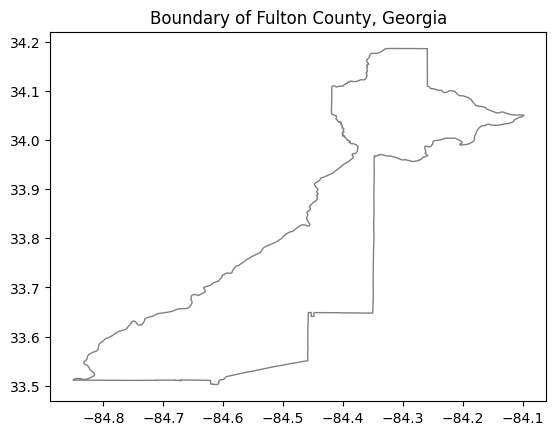

In [11]:
state_data = {
    "Alabama": {"Postal Abbr.": "AL", "FIPS Code": "01"},
    "Alaska": {"Postal Abbr.": "AK", "FIPS Code": "02"},
    "Arizona": {"Postal Abbr.": "AZ", "FIPS Code": "04"},
    "Arkansas": {"Postal Abbr.": "AR", "FIPS Code": "05"},
    "California": {"Postal Abbr.": "CA", "FIPS Code": "06"},
    "Colorado": {"Postal Abbr.": "CO", "FIPS Code": "08"},
    "Connecticut": {"Postal Abbr.": "CT", "FIPS Code": "09"},
    "Delaware": {"Postal Abbr.": "DE", "FIPS Code": "10"},
    "District of Columbia": {"Postal Abbr.": "DC", "FIPS Code": "11"},
    "Florida": {"Postal Abbr.": "FL", "FIPS Code": "12"},
    "Georgia": {"Postal Abbr.": "GA", "FIPS Code": "13"},
    "Hawaii": {"Postal Abbr.": "HI", "FIPS Code": "15"},
    "Idaho": {"Postal Abbr.": "ID", "FIPS Code": "16"},
    "Illinois": {"Postal Abbr.": "IL", "FIPS Code": "17"},
    "Indiana": {"Postal Abbr.": "IN", "FIPS Code": "18"},
    "Iowa": {"Postal Abbr.": "IA", "FIPS Code": "19"},
    "Kansas": {"Postal Abbr.": "KS", "FIPS Code": "20"},
    "Kentucky": {"Postal Abbr.": "KY", "FIPS Code": "21"},
    "Louisiana": {"Postal Abbr.": "LA", "FIPS Code": "22"},
    "Maine": {"Postal Abbr.": "ME", "FIPS Code": "23"},
    "Maryland": {"Postal Abbr.": "MD", "FIPS Code": "24"},
    "Massachusetts": {"Postal Abbr.": "MA", "FIPS Code": "25"},
    "Michigan": {"Postal Abbr.": "MI", "FIPS Code": "26"},
    "Minnesota": {"Postal Abbr.": "MN", "FIPS Code": "27"},
    "Mississippi": {"Postal Abbr.": "MS", "FIPS Code": "28"},
    "Missouri": {"Postal Abbr.": "MO", "FIPS Code": "29"},
    "Montana": {"Postal Abbr.": "MT", "FIPS Code": "30"},
    "Nebraska": {"Postal Abbr.": "NE", "FIPS Code": "31"},
    "Nevada": {"Postal Abbr.": "NV", "FIPS Code": "32"},
    "New Hampshire": {"Postal Abbr.": "NH", "FIPS Code": "33"},
    "New Jersey": {"Postal Abbr.": "NJ", "FIPS Code": "34"},
    "New Mexico": {"Postal Abbr.": "NM", "FIPS Code": "35"},
    "New York": {"Postal Abbr.": "NY", "FIPS Code": "36"},
    "North Carolina": {"Postal Abbr.": "NC", "FIPS Code": "37"},
    "North Dakota": {"Postal Abbr.": "ND", "FIPS Code": "38"},
    "Ohio": {"Postal Abbr.": "OH", "FIPS Code": "39"},
    "Oklahoma": {"Postal Abbr.": "OK", "FIPS Code": "40"},
    "Oregon": {"Postal Abbr.": "OR", "FIPS Code": "41"},
    "Pennsylvania": {"Postal Abbr.": "PA", "FIPS Code": "42"},
    "Puerto Rico": {"Postal Abbr.": "PR", "FIPS Code": "72"},
    "Rhode Island": {"Postal Abbr.": "RI", "FIPS Code": "44"},
    "South Carolina": {"Postal Abbr.": "SC", "FIPS Code": "45"},
    "South Dakota": {"Postal Abbr.": "SD", "FIPS Code": "46"},
    "Tennessee": {"Postal Abbr.": "TN", "FIPS Code": "47"},
    "Texas": {"Postal Abbr.": "TX", "FIPS Code": "48"},
    "Utah": {"Postal Abbr.": "UT", "FIPS Code": "49"},
    "Vermont": {"Postal Abbr.": "VT", "FIPS Code": "50"},
    "Virginia": {"Postal Abbr.": "VA", "FIPS Code": "51"},
    "Virgin Islands": {"Postal Abbr.": "VI", "FIPS Code": "78"},
    "Washington": {"Postal Abbr.": "WA", "FIPS Code": "53"},
    "West Virginia": {"Postal Abbr.": "WV", "FIPS Code": "54"},
    "Wisconsin": {"Postal Abbr.": "WI", "FIPS Code": "55"},
    "Wyoming": {"Postal Abbr.": "WY", "FIPS Code": "56"}
}






# 1. Load the US county boundaries dataset
url = "https://www2.census.gov/geo/tiger/TIGER2020/COUNTY/tl_2020_us_county.zip"  # Latest county boundaries dataset
r = requests.get(url)
with open("tl_2020_us_county.zip", "wb") as f:
    f.write(r.content)
counties = gpd.read_file("tl_2020_us_county.zip")

# 2. Specify the desired county
county_name = "Fulton County"  # Replace with the actual county name
state_name = "Georgia"  # Replace with the state name if needed
state_fp = state_data[state_name]["FIPS Code"]

# 3. Filter the county using name and optionally state
county = counties[(counties["NAMELSAD"] == county_name) & (counties["STATEFP"] == state_fp)]

# 4. Access the boundary coordinates
boundary_coordinates = county.geometry.iloc[0].exterior.coords.xy

# 6. Optional: Visualize the boundary on a map
import matplotlib.pyplot as plt

plt.plot(boundary_coordinates[0], boundary_coordinates[1], linewidth=1, color='gray')